### This jupyter notebook contains contents of the lesson "Mutual information and correlation"

**Author : Umidjon Sattorov. Machine Learning engineer**

___

In [ ]:
%pip install -U scikit-learn

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.datasets import load_iris, load_diabetes

In [4]:
# Loading dataframes
df = pd.read_csv("./medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Correlation

* Pearson correlation

In [8]:
df.corr()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003154,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022609,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
sex,0.003154,-0.022609,1.000000,0.498221,0.155115,0.005985,0.015195,-0.035833,-0.020698,0.337664,0.170682,0.005991,0.007953
height,-0.003038,-0.081515,0.498221,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155115,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.005985,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015195,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035833,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020698,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.337664,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [ ]:
%pip install seaborn

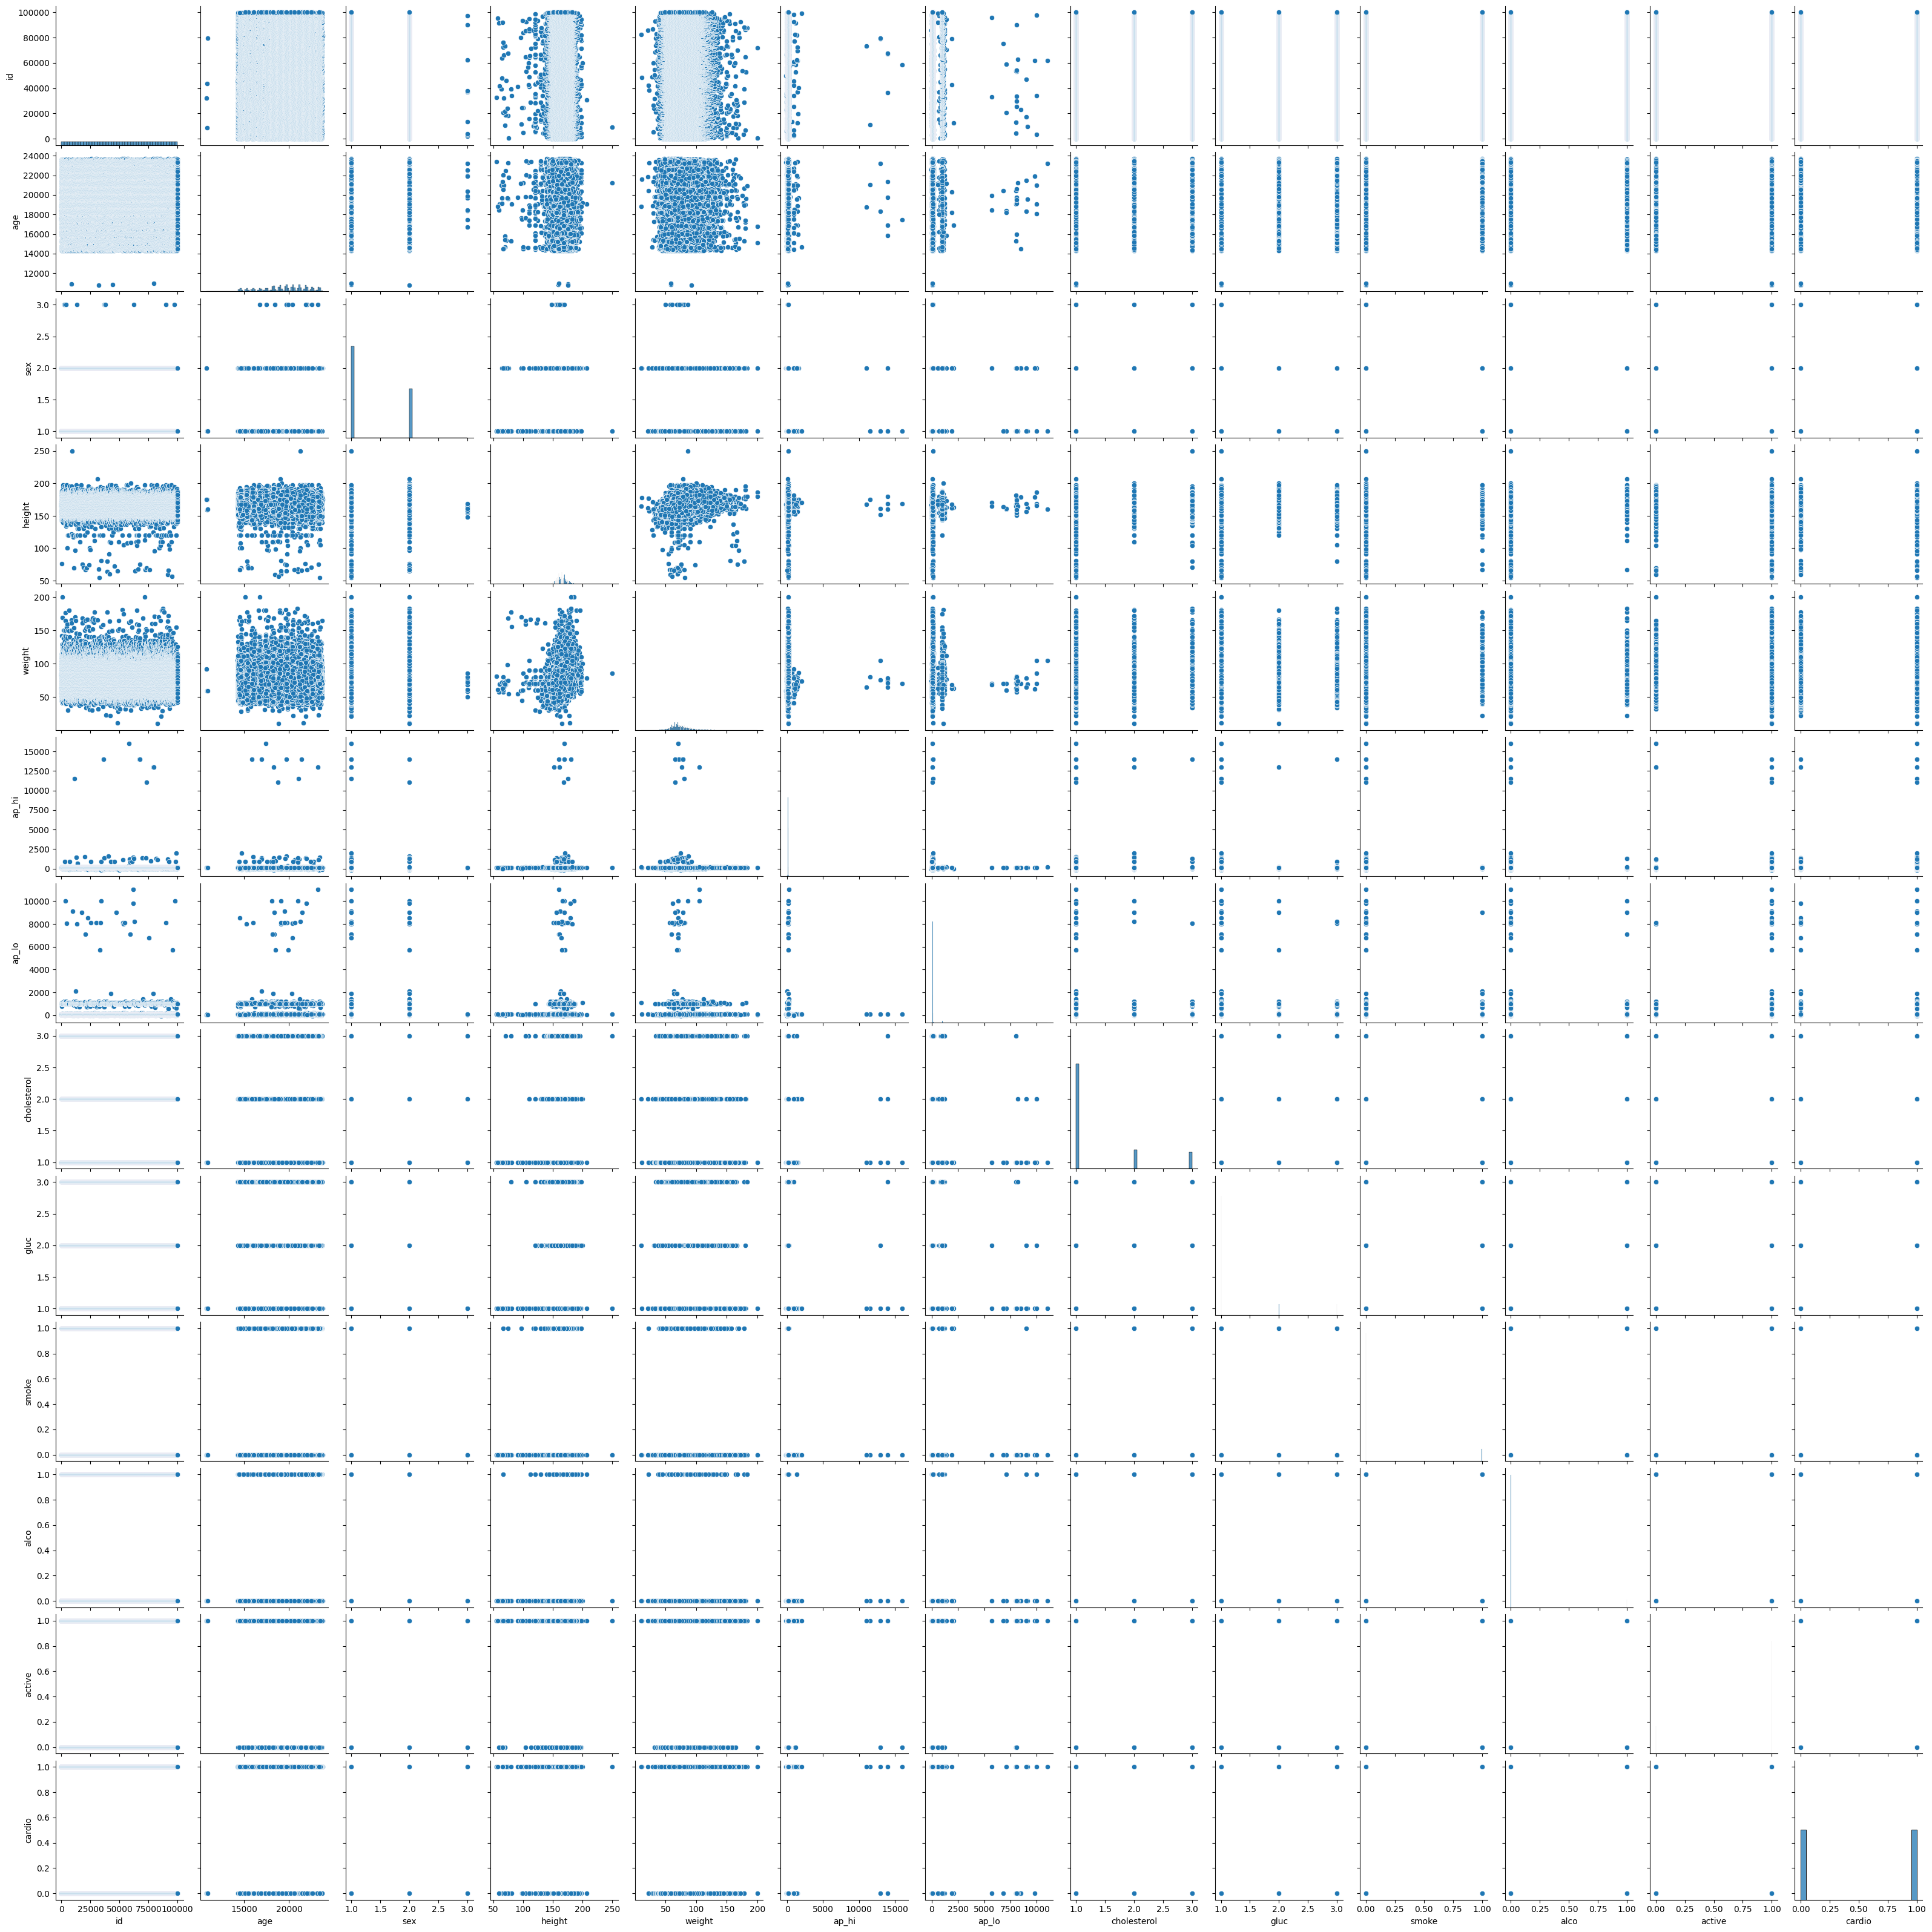

In [7]:
import seaborn as sns

sns.pairplot(data = df)

____

# MI(Mutual information)

In [8]:
#Splitting data into X and y variables
X = df.drop(columns = 'cardio')
y = df['cardio']

In [9]:
# Calculating MI for each variable
mi_scores = mutual_info_regression(X, y)
mi_scores

array([0.00047462, 0.03087133, 0.00222446, 0.        , 0.02266509,
       0.12030139, 0.06797175, 0.02570095, 0.00077496, 0.00121211,
       0.00390615, 0.00461303])

In [ ]:
mi_scores_ser = pd.Series(mi_scores, index = X.columns).sort_values(ascending = False)
mi_scores_ser

ap_hi          0.120301
ap_lo          0.067972
age            0.030871
cholesterol    0.025701
weight         0.022665
active         0.004613
alco           0.003906
sex            0.002224
smoke          0.001212
gluc           0.000775
id             0.000475
height         0.000000
dtype: float64